<a href="https://colab.research.google.com/github/DARoSLab/Adv_robot_dyn_ctrl/blob/main/Lectures/Lecture3_inv_kin_planar_openchain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Lecture 3. Inverse Kinematics of Planar Manipulator**

# The Two-link Planar Manipulator


<img src="https://raw.githubusercontent.com/RussTedrake/manipulation/master/figures/exercises/planar_two_link.png" width="700">





In [46]:
# python libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import animation
from IPython.display import HTML
from math import pi

%matplotlib inline


# [Utility function] Plot planar mainpulator

**You can use the provided function below to visualize the robot. It depends on your implementation of the forward kinematics function.**


In [47]:
def plot_planar_manipulator(q, l1, l2, target=None, eff_path=None):
  fig= plt.figure(figsize=(10,10))
  ax = plt.subplot(1,1,1)

  link1, = ax.plot([], [], 'b', lw=10)     # ax.plot returns a list of 2D line objects
  link2, = ax.plot([], [], 'r', lw=10)
  eff, = ax.plot([], [], 'g', marker='o', markersize=15)

  if eff_path is not None:
    ep, = ax.plot(eff_path[:, 0], eff_path[:, 1], 'g-')
  if target is not None:
    goal, = ax.plot([target[0]], [target[1]], 'r', marker='*', markersize=20)

  ax.set_xlim(( -2.5, 2.5))
  ax.set_ylim((-2.5, 2.5))
  txt_title = ax.set_title('')
  length = len(q)
  def drawFrame(k):
    q0, q1 = q[k]

    rA = [0, 0]
    rB = [l1*np.cos(q0), l2*np.sin(q0)]
    rC = forward_kinematics(q[k, :], l1, l2)

    link1.set_data([rA[0], rB[0]], [rA[1], rB[1]])
    link2.set_data([rB[0], rC[0]], [rB[1], rC[1]])
    eff.set_data([rC[0], rC[0]],[rC[1], rC[1]])
    return link1, link2, eff
  anim = animation.FuncAnimation(fig, drawFrame, frames=length, interval=100, blit=True)
  return anim



#Newton-Rapson based inverse kinematics


In [51]:
def newton_IK(x_goal, q_init, l1 = 1, l2 = 1):
  # array to hold joint position iterations
  q_anim = []

  # Choose an initial guess for joint position,
  qi = q_init

  q_anim += [qi.copy()]

  # Compute error between goal and current EE position
  d_x = x_goal - forward_kinematics(qi, l1, l2) # Your code here

  # Small value at which we stop iterating if the error is smaller
  epsilon = 0.01
  step_size = 0.2
  iter = 0
  # Complete while loop
  while np.linalg.norm(d_x) > epsilon and iter < 100:
    # Get Jacobian at current joint position
    J = get_jacobian(qi, l1, l2)

    # Get Jacobian psuedo-inverse
    Jinv = np.linalg.pinv(J)

    # Compute change in joint position using corresponding
    #  change in EE position
    dq = Jinv @ d_x

    # Update joint position
    qi = qi + step_size * dq

    d_x = x_goal - forward_kinematics(qi)

    q_anim += [qi.copy()]

    # Update error between goal and current EE position

    iter += 1
  # Returns final joint position and joint data for animation
  return (qi, q_anim)

def forward_kinematics(q, l1=1, l2=1):
  q0, q1 = q
  x = l1*np.cos(q0) + l2*np.cos(q0+q1)
  y = l1*np.sin(q0) + l2*np.sin(q0+q1)
  return np.array([x,y])

def get_jacobian(q, l1=1, l2=1):
  # Use these variables and the link lengths in function def
  q0, q1 = q
  J = [[], []]

  J[0] = [-l1*np.sin(q0)-l2*np.sin(q0+q1), -l2*np.sin(q0+q1)]
  J[1] = [ l1*np.cos(q0)+l2*np.cos(q0+q1), l2*np.cos(q0+q1)]

  return np.array(J)



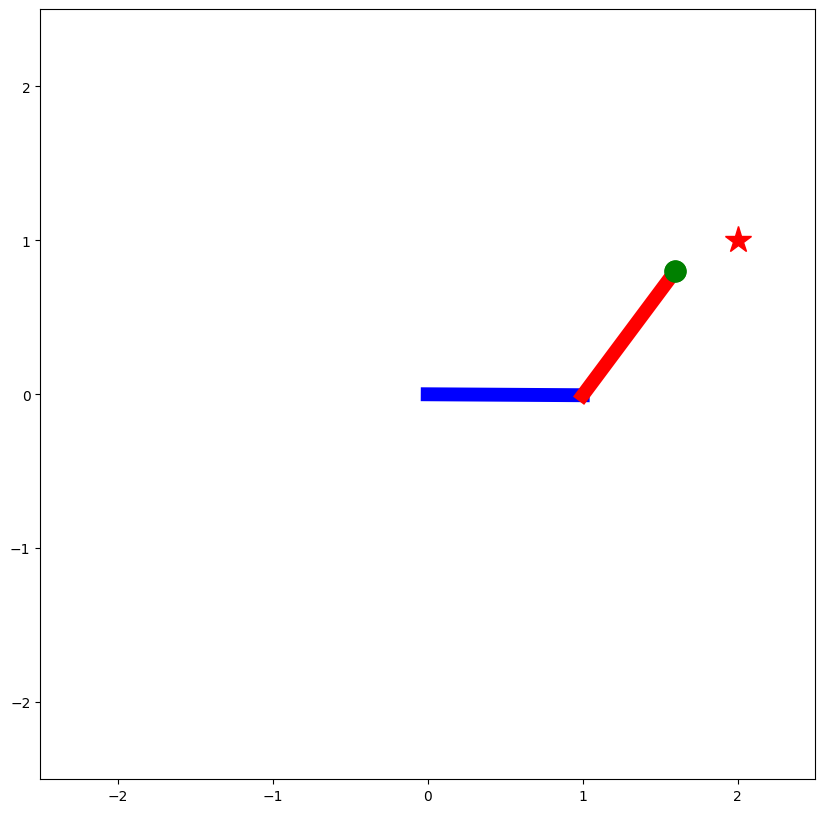

In [53]:
# run inverse kinematics
l1 = 1
l2 = 1
x_goal = np.array([2.0, 1.0])

qi, q_anim = newton_IK(x_goal, np.array([0.2, 0.7]), l1, l2)
anim = plot_planar_manipulator(np.array(q_anim), l1, l2, x_goal)
HTML(anim.to_html5_video())